

# Predicting Customer Satisfaction on Rent the Runway

##  I. Data Cleaning for Customer Data 
### Katrin Ayrapetov


<font style="font-size: 2rem; color: blue">


 
</font>

### Overview of the Notebook: 

Data was scraped from the website Rent_the_Runway. There is a total of  208,747 observations. 

**Features describing the customer:**  Nickname, Type_of_customer, Size of the garment customer rented, Size the customer usually wears, Height, Age, Bust Size, Body Type, Weight, Date the customer rented the garment, Reason the garment was rented, Overall fit of the garment  

**Features describing the dress:** Retail Price of the garment, Rent price of the garment, Product Details, Number of Reviews left for that Garment 

In this notebook, the features describing the customer were cleaned. 
* All the entries that were in the wrong column were re-entered in the correct column. Regex was used a lot for this purpose. 
* Height was converted from feet and inches to just inches. 
* A new feature "BMI" was created out of the weight and height features. 
* The date that the garment was rented was replaced with the season that the garment was rented. 
* Rows where all of the customer measurements (Weight, Age, Height, Body Type) were missing were deleted. 
* After the cleaning of the customer data, 161,418 observations remain. 



In [1]:
#Import the necessary libraries. 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)

In [2]:
#Import the Data Set 
df1 =  pd.read_csv('../Data/Raw_Data_Rent_the_Runway(1).csv')
df2 =  pd.read_csv('../Data/Raw_Data_Rent_the_Runway(2).csv')
df3 =  pd.read_csv('../Data/Raw_Data_Rent_the_Runway(3).csv')
df4 =  pd.read_csv('../Data/Raw_Data_Rent_the_Runway(4).csv')
df5 =  pd.read_csv('../Data/Raw_Data_Rent_the_Runway(5).csv')
df6 =  pd.read_csv('../Data/Raw_Data_Rent_the_Runway(6).csv')
df7 =  pd.read_csv('../Data/Raw_Data_Rent_the_Runway(7).csv')
df8 =  pd.read_csv('../Data/Raw_Data_Rent_the_Runway(8).csv')
df9 =  pd.read_csv('../Data/Raw_Data_Rent_the_Runway(9).csv')
df10 =  pd.read_csv('../Data/Raw_Data_Rent_the_Runway(10).csv')
df11 =  pd.read_csv('../Data/Raw_Data_Rent_the_Runway(11).csv')

In [3]:
#Join all the data sets into one data set 
df = pd.concat([df1, df2,df3,df4,df5,df6,df7,df8,df9,df10,df11])
df = df.reset_index(drop=True)

In [4]:
#The data set has 24 features and 208,474 observations. 
df.shape

(208474, 24)

In [5]:
#Create a checklist which will be used to make sure the cleaning is done correctly. 
check_list=[1,45,200,1100,6565,7500]
check_list

[1, 45, 200, 1100, 6565, 7500]

In [6]:
#Rename the columns 
df.columns = ["title_of_review",
              "image","Nickname","Type_of_Customer",
              "Size","Overall_fit","Rented_for","Size_usually_worn",
              "Height","Age","Label6","Bust_size",
              "Label8","Body_type","Weight","Rating",
              "Date","Review_body","Brand","Dress_Description",
              "Retail_price", "Rent_price","Product_details","Number_of_reviews"]


In [7]:
#Drop columns that are not using 
df.drop(columns = ["title_of_review","image","Nickname","Review_body"],inplace=True)

In [58]:
maternity_index = []
for i in range(df.shape[0]):
    if "maternity" in df['Dress_Description'][i]:
        maternity_index.append(i)
df = df.drop(labels=maternity_index, axis=0)
df = df.reset_index()
df.drop(columns=["index"],inplace=True)

In [9]:
#Change the date when the garment was rented to just the season.
for i in range(df.shape[0]):
    if "JANUARY" in df["Date"][i] or "DECEMBER" in df["Date"][i] or "FEBRUARY" in df["Date"][i]:
        df.at[i, "Date"] = "winter"
    if "AUGUST" in df["Date"][i] or "JUNE" in df["Date"][i] or "JULY" in df["Date"][i]:
        df.at[i, "Date"] = "summer"
    if "SEPTEMBER" in df["Date"][i] or "NOVEMBER" in df["Date"][i] or "OCTOBER" in df["Date"][i]:
        df.at[i, "Date"] = "fall"
    if "MAY" in df["Date"][i] or "APRIL" in df["Date"][i] or "MARCH" in df["Date"][i]:
        df.at[i, "Date"] = "spring"

In [10]:
#Fill in the nulls in Type_of_customer feature with "unknown"
df['Type_of_Customer'].fillna("unknown", inplace=True)

In [11]:
#This is the breakdown for type_of_customer feature. 
df.Type_of_Customer.value_counts()

TOP CONTRIBUTOR    163504
unknown             44970
Name: Type_of_Customer, dtype: int64

In [12]:
df['Dress_Description'] = df['Dress_Description'].str.lower()
df['Brand'] = df['Brand'].str.lower()

In [13]:
#Convert the rating that the customer left to just an integer
print(f"The data frame has {df.shape[0]} observations. There are {df.Rating.isna().sum()} nulls for the Rating feature. ")
print(df.Rating.value_counts())
#Get rid of unnecessary characters in some entries. 
df["Rating"]=df["Rating"].replace(" out of 5 stars","", regex=True)
df["Rating"]=df["Rating"].replace("\(","", regex=True)
df["Rating"]=df["Rating"].replace("\)","", regex=True)
df["Rating"]=df["Rating"].astype("int")
print(df.Rating.value_counts())

The data frame has 208474 observations. There are 0 nulls for the Rating feature. 
(5 out of 5 stars)    125250
(4 out of 5 stars)     47480
(3 out of 5 stars)     20194
(2 out of 5 stars)      8681
(1 out of 5 stars)      6869
Name: Rating, dtype: int64
5    125250
4     47480
3     20194
2      8681
1      6869
Name: Rating, dtype: int64


In [14]:
#Get rid of observations where there are nulls in ALL 5 customer measurement features. 
# This will leave only 202,383 observations 
df.dropna(how="all",subset=['Age','Weight','Body_type','Bust_size','Height'], inplace=True)
df = df.reset_index()
df.drop(columns=["index"],inplace=True)

In [15]:
#Fill in the null values in columns Size Usually Worn, Age, Weight, Body_type, Bust_size and Height as "unknown" for now
df['Rented_for'].fillna("unknown", inplace=True)
df['Size_usually_worn'].fillna("unknown", inplace=True)
df['Age'].fillna("unknown", inplace=True)
df['Weight'].fillna("unknown", inplace=True)
df['Body_type'].fillna("unknown", inplace=True)
df['Bust_size'].fillna("unknown", inplace=True)
df['Height'].fillna("unknown", inplace=True)

In [16]:
#Weight in Body Type fix rows 
weight_in_body_type=[]
for i in range(df.shape[0]):
    if "LBS" in df["Body_type"][i]:
        weight_in_body_type.append(i)
print(f"There are {len(weight_in_body_type)} observations where the weight is entered in the Body Type column. ")
print("Should match with this number:")
print(df.Label8.value_counts()["Weight: "])

print("Example of one such row BEFORE the transformation:")
print(f"This is the body type entry for row {weight_in_body_type[0]}")
print(df["Body_type"][weight_in_body_type[0]])
print(f"This is the weight type entry for {weight_in_body_type[0]}")
print(df["Weight"][weight_in_body_type[0]])

#Grab all the weights accidently entered into the Body Type column:
#(1) Enter them into the weight column
#(2) Replace the body type observation with "unknown"
for i in weight_in_body_type:
    df.at[i, "Weight"] = df["Body_type"][i]
    df.at[i, "Body_type"] = "unknown"
    
    
print("Example of one such row AFTER the transformation:")
print(f"This is the body type entry for row {weight_in_body_type[0]}")
print(df["Body_type"][weight_in_body_type[0]])
print(f"This is the weight type entry for {weight_in_body_type[0]}")
print(df["Weight"][weight_in_body_type[0]])

There are 12223 observations where the weight is entered in the Body Type column. 
Should match with this number:
12223
Example of one such row BEFORE the transformation:
This is the body type entry for row 13
155LBS
This is the weight type entry for 13
unknown
Example of one such row AFTER the transformation:
This is the body type entry for row 13
unknown
This is the weight type entry for 13
155LBS


In [17]:
#Weight in Bust_Size fix rows 
weight_in_bust_size=[]
for i in range(df.shape[0]):
    if "LBS" in df["Bust_size"][i]:
        weight_in_bust_size.append(i)

print(f"There are {len(weight_in_bust_size)} observations where the weight is entered in the Bust Size column. ")
print("Should match with this number:")
print(df.Label6.value_counts()["Weight: "])

print("Example of one such row before the transformation:")
print(f"This is the bust size  entry for row {weight_in_bust_size[0]}")
print(df["Bust_size"][weight_in_bust_size[0]])
print(f"This is the weight type entry for {weight_in_bust_size[0]}")
print(df["Weight"][weight_in_bust_size[0]])

#Grab all the weights accidently entered into the Bust Size column:
#(1) Enter them into the weight column
#(2) Replace the Bust Size  observation with "unknown"
for i in weight_in_bust_size:
    df.at[i, "Weight"] = df["Bust_size"][i]
    df.at[i, "Bust_size"] = "unknown"
print("Example of one such row AFTER the transformation:")
print(f"This is the bust size  entry for row {weight_in_bust_size[0]}")
print(df["Bust_size"][weight_in_bust_size[0]])
print(f"This is the weight type entry for {weight_in_bust_size[0]}")
print(df["Weight"][weight_in_bust_size[0]])

There are 958 observations where the weight is entered in the Bust Size column. 
Should match with this number:
958
Example of one such row before the transformation:
This is the bust size  entry for row 326
135LBS
This is the weight type entry for 326
unknown
Example of one such row AFTER the transformation:
This is the bust size  entry for row 326
unknown
This is the weight type entry for 326
135LBS


In [18]:
#Weight in Age fix rows 
weight_in_age=[]
for i in range(df.shape[0]):
    if "LBS" in df["Age"][i]:
        weight_in_age.append(i)

print(f"There are {len(weight_in_age)} observations where the weight is entered in the age column. ")

print("Example of one such row BEFORE the transformation:")
print(f"This is the age  entry for row {weight_in_age[0]}")
print(df["Age"][weight_in_age[0]])
print(f"This is the weight entry for {weight_in_age[0]}")
print(df["Weight"][weight_in_age[0]])

#Grab all the weights accidently entered into the Age column:
#(1) Enter them into the weight column
#(2) Replace the Age  observation with "unknown"
for i in weight_in_age:
    df.at[i, "Weight"] = df["Age"][i]
    df.at[i, "Age"] = "unknown"
print("Example of one such row AFTER the transformation:")
print(f"This is the age  entry for row {weight_in_age[0]}")
print(df["Age"][weight_in_age[0]])
print(f"This is the weight entry for {weight_in_age[0]}")
print(df["Weight"][weight_in_age[0]])

There are 63 observations where the weight is entered in the age column. 
Example of one such row BEFORE the transformation:
This is the age  entry for row 6339
155LBS
This is the weight entry for 6339
unknown
Example of one such row AFTER the transformation:
This is the age  entry for row 6339
unknown
This is the weight entry for 6339
155LBS


In [19]:
#Weight in Height fix rows 
weight_in_height=[]
for i in range(df.shape[0]):
    if "LBS" in df["Height"][i]:
        weight_in_height.append(i)
print(f"There are {len(weight_in_height)} observations where the weight is entered in the height column. ")
if len(weight_in_height)>0:
    print(f"There are {len(weight_in_height)} observations where the weight is entered in the height column. ")
    print("Example of one such row BEFORE the transformation:")
    print(f"This is height entry for row {weight_in_height[0]}")
    print(df["Height"][weight_in_height[0]])
    print(f"This is the weight entry for {weight_in_height[0]}")
    print(df["Weight"][weight_in_height[0]])

#Grab all the weights accidently entered into the Height column:
#(1) Enter them into the weight column
#(2) Replace the Height  observation with "unknown"
for i in weight_in_height:
    df.at[i, "Weight"] = df["Height"][i]
    df.at[i, "Height"] = "unknown"
print("Example of one such row before the transformation:")
print(f"This is height entry for row {weight_in_height[0]}")
print(df["Height"][weight_in_height[0]])
print(f"This is the weight entry for {weight_in_height[0]}")
print(df["Weight"][weight_in_height[0]])

There are 7 observations where the weight is entered in the height column. 
There are 7 observations where the weight is entered in the height column. 
Example of one such row BEFORE the transformation:
This is height entry for row 31076
130LBS
This is the weight entry for 31076
unknown
Example of one such row before the transformation:
This is height entry for row 31076
unknown
This is the weight entry for 31076
130LBS


In [20]:
#Strip the weights off the "LBS" and clean up weights entered two or three times. 
print("Before:")
for i in check_list:
    print(df["Weight"][i])
for i in range(df.shape[0]):
    if df["Weight"][i][0]=="1" or df["Weight"][i][0]=="2":
        df.at[i, "Weight"]=df["Weight"][i][:3]
    elif df["Weight"][i][0]=="9" or df["Weight"][i][0]=="8":
        df.at[i, "Weight"]=df["Weight"][i][:2]
    elif df["Weight"][i][0]=="3":
        df.at[i, "Weight"] = "unknown"

df["Weight"]=df["Weight"].replace("l","0", regex=True).replace("L","0", regex=True)

for i in range(df.shape[0]):
    if "b" in df["Weight"][i].lower():
        df.at[i, "Weight"] = "unknown"
print("After:")
for i in check_list:
    print(df["Weight"][i])

Before:
unknown
145LBS
180LBS
unknown
125LBS
115LBS
After:
unknown
145
180
unknown
125
115


In [21]:
list_of_body_types = ['athletic','hourglass','pear','apple','fullbust','straightnarrow','petite','ATHLETIC',
 'HOURGLASS',
 'PEAR',
 'APPLE',
 'FULLBUST',
 'STRAIGHTNARROW',
 'PETITE']

In [22]:
#look at the rows where the body type has been entered into the bust_size 
body_type_in_bust_size=[]
for i in range(df.shape[0]):
    if df["Label6"][i]=="Body type: ":
        body_type_in_bust_size.append(i)
print(f"There are {len(body_type_in_bust_size)} observations where the body_type is entered in the Bust_size column. ")
print("Should match with this number:")
print(df.Label6.value_counts()["Body type: "])
print("These are one such row before transformation")
print(f"This is bust size  entry for row {body_type_in_bust_size[5]}")
print(df["Bust_size"][body_type_in_bust_size[5]])
print(f"This is the body type entry for {body_type_in_bust_size[5]}")
print(df["Body_type"][body_type_in_bust_size[5]])

#Grab all the body type accidently entered into the bust size  column:
#(1) Enter them into the body type column
#(2) Replace the bust size  observation with "unknown"
for i in body_type_in_bust_size:
    df.at[i, "Body_type"] = df["Bust_size"][i].lower().replace(" & ","").replace(" ","")
    df.at[i, "Bust_size"]="unknown"
print("These are one such row AFTER  transformation")
print(f"This is bust size  entry for row {body_type_in_bust_size[5]}")
print(df["Bust_size"][body_type_in_bust_size[5]])
print(f"This is the body type entry for {body_type_in_bust_size[5]}")
print(df["Body_type"][body_type_in_bust_size[5]])

There are 18232 observations where the body_type is entered in the Bust_size column. 
Should match with this number:
18232
These are one such row before transformation
This is bust size  entry for row 29
HOURGLASS
This is the body type entry for 29
unknown
These are one such row AFTER  transformation
This is bust size  entry for row 29
unknown
This is the body type entry for 29
hourglass


In [23]:
#Get rid of the + symbol in the some of the bust sizes. 
df["Bust_size"]=df["Bust_size"].replace("\+","", regex=True)

In [24]:
#look at the rows where the body type has been entered into the Age 
body_type_in_age=[]
for i in range(df.shape[0]):
    if df["Age"][i].lower().replace(" & ","").replace(" ","") in list_of_body_types:
        body_type_in_age.append(i)
        
print(f"There are {len(body_type_in_age)} observations where the body_type is entered in the Bust_size column. ")

print("These are one such row before transformation")
print(f"This is Age entry for row {body_type_in_age[-1]}")
print(df["Age"][body_type_in_age[-1]])
print(f"This is the body type entry for {body_type_in_age[-1]}")
print(df["Body_type"][body_type_in_age[-1]])

#Grab all the body type accidently entered into the Age  column:
#(1) Enter them into the body type column
#(2) Replace the Age  observation with "unknown"
for i in body_type_in_age:
    df.at[i, "Body_type"] = df["Age"][i].lower().replace(" & ","").replace(" ","")
    df.at[i, "Age"]="unknown"
    
    
print("These are one such row AFTER transformation")
print(f"This is Age entry for row {body_type_in_age[-1]}")
print(df["Age"][body_type_in_age[-1]])
print(f"This is the body type entry for {body_type_in_age[-1]}")
print(df["Body_type"][body_type_in_age[-1]])

There are 184 observations where the body_type is entered in the Bust_size column. 
These are one such row before transformation
This is Age entry for row 202175
ATHLETIC
This is the body type entry for 202175
unknown
These are one such row AFTER transformation
This is Age entry for row 202175
unknown
This is the body type entry for 202175
athletic


In [25]:
#look at the rows where the body type has been entered into the Height 
body_type_in_height=[]
for i in range(df.shape[0]):
    if df["Height"][i].lower().replace(" & ","").replace(" ","") in list_of_body_types:
        body_type_in_height.append(i)
print(f"There are {len(body_type_in_height)} observations where the body_type is entered in the Height column. ")
if len(body_type_in_height)>0:
    print("These are one such row before transformation")
    print(f"This is height entry for row {body_type_in_height[0]}")
    print(df["Height"][body_type_in_height[0]])
    print(f"This is the body type entry for {body_type_in_height[0]}")
    print(df["Body_type"][body_type_in_height[0]])
    
    #Grab all the body type accidently entered into the Height  column:
    #(1) Enter them into the body type column
    #(2) Replace theHeight observation with "unknown"
    for i in body_type_in_height:
        df.at[i, "Body_type"] = df["Height"][i].lower().replace(" & ","").replace(" ","")
        df.at[i, "Height"]="unknown"


    print("These are one such row AFTER transformation")
    print(f"This is height entry for row {body_type_in_height[0]}")
    print(df["Height"][body_type_in_height[0]])
    print(f"This is the body type entry for {body_type_in_height[0]}")
    print(df["Body_type"][body_type_in_height[0]])


There are 7 observations where the body_type is entered in the Height column. 
These are one such row before transformation
This is height entry for row 14398
HOURGLASS
This is the body type entry for 14398
unknown
These are one such row AFTER transformation
This is height entry for row 14398
unknown
This is the body type entry for 14398
hourglass


In [26]:
#Clean up the body types 
for i in range(df.shape[0]):
    df.at[i, "Body_type"] = df["Body_type"][i].lower().replace(" & ","").replace(" ","")

In [27]:
#Final check of Body Types. Should just be body types here. 
df.Body_type.value_counts()

hourglass         60310
athletic          44365
pear              23000
petite            20598
unknown           16623
fullbust          16572
straightnarrow    13833
apple              7082
Name: Body_type, dtype: int64

In [28]:
#Bust_size_in_Age_Column 
bust_size_in_age=[]
pattern = "^.*[0-9]{2}[a-zA-Z]{1}.*$"
for i in range(df.shape[0]):
    if re.match(pattern, df["Age"][i]): 
        bust_size_in_age.append(i)
    
print(f"There are {len(bust_size_in_age)} observations where the bust_size is entered in the age column. ")

print("This is one such observation BEFORE transformation:")
print(f"This is age entry for row {bust_size_in_age[0]}")
print(df["Age"][bust_size_in_age[0]])
print(f"This is the body type entry for {bust_size_in_age[0]}")
print(df["Bust_size"][bust_size_in_age[0]])

#Grab all the bust size  accidently entered into the Age  column:
#(1) Enter them into the bust size  column
#(2) Replace the Age  observation with "unknown"
for i in bust_size_in_age:
    df.at[i, "Bust_size"] = df["Age"][i]
    df.at[i, "Age"] = "unknown"

print("This is one such observation AFTER transformation:")
print(f"This is age entry for row {bust_size_in_age[0]}")
print(df["Age"][bust_size_in_age[0]])
print(f"This is the body type entry for {bust_size_in_age[0]}")
print(df["Bust_size"][bust_size_in_age[0]])

There are 1973 observations where the bust_size is entered in the age column. 
This is one such observation BEFORE transformation:
This is age entry for row 137
34D
This is the body type entry for 137
unknown
This is one such observation AFTER transformation:
This is age entry for row 137
unknown
This is the body type entry for 137
34D


In [29]:
#Bust_size_in_Height_Column 
bust_size_in_height=[]
pattern = "^.*[0-9]{2}[a-zA-Z]{1}.*$"
for i in range(df.shape[0]):
    if re.match(pattern, df["Height"][i]):
        bust_size_in_height.append(i)
print(f"There are {len(bust_size_in_height)} observations where the bust_size is entered in the height column. ")

print("This is one such observation BEFORE transformation:")
print(f"This is height entry for row {bust_size_in_height[0]}")
print(df["Height"][bust_size_in_height[0]])
print(f"This is the bust size  entry for {bust_size_in_height[0]}")
print(df["Bust_size"][bust_size_in_height[0]])

#Grab all the bust size  accidently entered into the Height column:
#(1) Enter them into the bust size  column
#(2) Replace the Height observation with "unknown"
for i in bust_size_in_height:
    df.at[i, "Bust_size"] = df["Height"][i]
    df.at[i, "Height"] = "unknown"

print("This is one such observation AFTER transformation:")
print(f"This is height entry for row {bust_size_in_height[0]}")
print(df["Height"][bust_size_in_height[0]])
print(f"This is the bust size  entry for {bust_size_in_height[0]}")
print(df["Bust_size"][bust_size_in_height[0]])

There are 62 observations where the bust_size is entered in the height column. 
This is one such observation BEFORE transformation:
This is height entry for row 6339
36B
This is the bust size  entry for 6339
unknown
This is one such observation AFTER transformation:
This is height entry for row 6339
unknown
This is the bust size  entry for 6339
36B


In [30]:
#Age entered in Height Columnn
age_in_height = []
for i in range(df.shape[0]):
    if str(df["Height"][1][1]) not in str(df["Height"][i]) and "unknown" not in str(df["Height"][i]):
        age_in_height.append(i)

print(f"There are {len(age_in_height)} observations where the age is entered in the height column. ")   

print("This is one such observation BEFORE transformation:")
print(f"This is age entry for row {age_in_height[0]}")
print(df["Height"][age_in_height[0]])
print(f"This is the height entry for {age_in_height[0]}")
print(df["Age"][age_in_height[0]])

#Grab all the Age accidently entered into the Height column:
#(1) Enter them into the age column
#(2) Replace the Height observation with "unknown"
for i in age_in_height:
    df.at[i, "Age"] = df["Height"][i]
    df.at[i, "Height"] = "unknown"
    
print("This is one such observation AFTER transformation:")
print(f"This is age entry for row {age_in_height[0]}")
print(df["Height"][age_in_height[0]])
print(f"This is the height entry for {age_in_height[0]}")
print(df["Age"][age_in_height[0]])

There are 4895 observations where the age is entered in the height column. 
This is one such observation BEFORE transformation:
This is age entry for row 72
28
This is the height entry for 72
unknown
This is one such observation AFTER transformation:
This is age entry for row 72
unknown
This is the height entry for 72
28


In [31]:
#Height entered in the size usually worn 
height_in_usual_size = []
for i in range(df.shape[0]):
    if str(df["Height"][1][1]) in str(df["Size_usually_worn"][i]):
        height_in_usual_size.append(i)
print(f"There are {len(height_in_usual_size)} observations where the height is entered in the Size_Usually_worn column. ") 

print("This is one such observation BEFORE transformation:")
print(f"This is Size_usually_worn entry for row {height_in_usual_size[0]}")
print(df["Size_usually_worn"][height_in_usual_size[0]])
print(f"This is the height entry for {height_in_usual_size[0]}")
print(df["Height"][height_in_usual_size[0]])


#Grab all the heights accidently entered into the Size Usually Worn column:
#(1) Enter them into the height column
#(2) Replace the Size Usually Worn  observation with "unknown"

for i in height_in_usual_size:
    df.at[i, "Height"] = df["Size_usually_worn"][i]
    df.at[i, "Size_usually_worn"] = "unknown"
    
print("This is one such observation AFTER transformation:")
print(f"This is Size_usually_worn entry for row {height_in_usual_size[0]}")
print(df["Size_usually_worn"][height_in_usual_size[0]])
print(f"This is the height entry for {height_in_usual_size[0]}")
print(df["Height"][height_in_usual_size[0]])

There are 355 observations where the height is entered in the Size_Usually_worn column. 
This is one such observation BEFORE transformation:
This is Size_usually_worn entry for row 826
5' 6"
This is the height entry for 826
unknown
This is one such observation AFTER transformation:
This is Size_usually_worn entry for row 826
unknown
This is the height entry for 826
5' 6"


In [32]:
# "Rented for" observations entered in "Overall Fit"
rented_for_in_overall_fit = []
for i in range(df.shape[0]):
    if "Rented for: " in df["Overall_fit"][i]  and "Rented for: " not in df["Rented_for"][i]:
        rented_for_in_overall_fit.append(i)
print(f"There are {len(rented_for_in_overall_fit)} observations where the Rented_For observation is entered in Overall_fit column. ") 

print("This is one such observation BEFORE transformation:")
print(f"This is Overall Fit  entry for row {rented_for_in_overall_fit[0]}")
print(df["Overall_fit"][rented_for_in_overall_fit[0]])
print(f"This is the Rented for entry for row {rented_for_in_overall_fit[0]}")
print(df["Rented_for"][rented_for_in_overall_fit[0]])

#Grab all the Rented For  entered into the Overall_fit column:
#(1) Enter them into the Rented For column
#(2) Replace the Size Usually Worn  observation with "unknown"

for i in rented_for_in_overall_fit:
    df.at[i, "Rented_for"] = df["Overall_fit"][i]
    df.at[i, "Overall_fit"] = "unknown"
    
print("This is one such observation BEFORE transformation:")
print(f"This is Overall Fit  entry for row {rented_for_in_overall_fit[0]}")
print(df["Overall_fit"][rented_for_in_overall_fit[0]])
print(f"This is the Rented for entry for row {rented_for_in_overall_fit[0]}")
print(df["Rented_for"][rented_for_in_overall_fit[0]])

There are 82651 observations where the Rented_For observation is entered in Overall_fit column. 
This is one such observation BEFORE transformation:
This is Overall Fit  entry for row 62
Rented for: Vacation
This is the Rented for entry for row 62
Usually wears: 6Height: 5' 5"Age: 33Bust size: 34CBody type: Athletic
This is one such observation BEFORE transformation:
This is Overall Fit  entry for row 62
unknown
This is the Rented for entry for row 62
Rented for: Vacation


In [33]:
for i in range(df.shape[0]):
    if "Usually wears: " in df["Overall_fit"][i]:
        df.at[i, "Overall_fit"] = "unknown"

In [34]:
#This should only have the overall fit. 
df.Overall_fit.value_counts()

Overall fit: True to Size    83605
unknown                      82927
Overall fit: Small           20209
Overall fit: Large           15642
Name: Overall_fit, dtype: int64

In [35]:
# "Rented for" observations entered in "Size"
rented_for_in_size = []
for i in range(df.shape[0]):
    if "Rented for: " in df["Size"][i]  and "Rented for: " not in df["Rented_for"][i]:
        rented_for_in_size.append(i)
print(f"There are {len(rented_for_in_size)} observations where the Rented_For observation is entered in Size  column. ") 

print("This is one such observation BEFORE transformation:")
print(f"This is the Size entry for row {rented_for_in_size[0]}")
print(df["Size"][rented_for_in_size[0]])
print(f"This is the Rented for entry for row {rented_for_in_size[0]}")
print(df["Rented_for"][rented_for_in_size[0]])

#Grab all the Rented For  entered into the size column:
#(1) Enter them into the Rented For column
#(2) Replace the Size  observation with "unknown"

for i in rented_for_in_size:
    df.at[i, "Rented_for"] = df["Size"][i]
    df.at[i, "Size"] = "unknown"

print("This is one such observation AFTER transformation:")

print(f"This is the Size entry for row {rented_for_in_size[0]}")
print(df["Size"][rented_for_in_size[0]])
print(f"This is the Rented for entry for row {rented_for_in_size[0]}")
print(df["Rented_for"][rented_for_in_size[0]]) 

There are 276 observations where the Rented_For observation is entered in Size  column. 
This is one such observation BEFORE transformation:
This is the Size entry for row 36757
Rented for: Everyday
This is the Rented for entry for row 36757
unknown
This is one such observation AFTER transformation:
This is the Size entry for row 36757
unknown
This is the Rented for entry for row 36757
Rented for: Everyday


In [36]:
for i in range(df.shape[0]):
    if "Usually wears: " in str(df["Rented_for"][i]):
        df.at[i, "Rented_for"] = "unknown"

In [37]:
df["Rented_for"]=df["Rented_for"].replace("Rented for: ","", regex=True)

In [38]:
df["Rented_for"]=df["Rented_for"].replace("Other","unknown", regex=True)

In [39]:
#This should only have the rented for categories.
df.Rented_for.value_counts()

Work             41377
Wedding          35523
Everyday         30554
Party            30544
unknown          23917
Formal Affair    17709
Vacation         11497
Date             11262
Name: Rented_for, dtype: int64

In [40]:
#Write a function that converts Heights entered as Feet and inches to just inches. 
def height_to_inches_convert(col):
    
    '''
    function takes in column with feet and inches height format (e.g. 5 ' 5) and returns value in inches
    col: value with initial string format
    '''
    
    # extracting all numbers from the height column so split from special characters
    
    extract = col.str.extractall("(\d+)").reset_index()
    
    # 2 values come out: one for feet and one for inches
    # isolate both using boolean filter: match column indicates first and second value extracted where ft is index 0
    
    ft = extract["match"] == 0
    inches = extract["match"] == 1
    
    # using boolean filter to get ft, inches and then convert both to numeric
    # ft value multiplied by 12 to convert to inches

    ft_conversion = extract[ft].drop(["level_0", "match"], axis=1).reset_index(drop=True).apply(pd.to_numeric) * 12
    inch_conversion = extract[inches].drop(["level_0", "match"], axis=1).reset_index(drop=True).apply(pd.to_numeric)
    
    # add both numbers for total height in inches
    
    return ft_conversion[0] + inch_conversion[0]


In [41]:
df.Height.value_counts()

5' 4"      29697
5' 6"      25987
5' 5"      24990
5' 7"      24443
5' 3"      20906
5' 2"      17006
5' 8"      16675
5' 9"      12395
5' 1"       7075
5' 10"      7028
unknown     4616
5' 0"       4330
5' 11"      3474
6' 0"       1536
4' 11"      1247
6' 1"        345
4' 10"       223
6' 2"        149
4' 7"         58
4' 9"         52
6' 3"         47
4' 8"         40
4' 6"         34
6' 4"         15
6' 6"          5
7' 8"          4
8' 9"          1
8' 5"          1
10' 6"         1
57' 0"         1
4' 5"          1
6' 5"          1
Name: Height, dtype: int64

In [42]:
#Get rid of observations with unknown value Height Features 
df_unknowns = df[df["Height"]=="unknown"] 
df = df.drop(df_unknowns.index, axis=0) 
df = df.reset_index()


In [43]:
# Convert the Height from feet and inches to just inches. Recast as an integer. 
df["Height"] = height_to_inches_convert(col=df["Height"])
df["Height"]=df["Height"].astype("int")

In [44]:
df.drop(columns="index",inplace=True)
df.drop(columns=["Label6","Label8"],inplace=True)

In [45]:
#Get rid of observations with unknown Ages 
df_unknowns_age = df[df["Age"]=="unknown"] 
df = df.drop(df_unknowns_age.index, axis=0) 
df = df.reset_index()
df.drop(columns="index",inplace=True)
df["Age"]=df["Age"].astype("int")


In [46]:
#Get rid of observations with unknown Weights 
df_unknowns_weight = df[df["Weight"]=="unknown"] 
df = df.drop(df_unknowns_weight.index, axis=0) 
df = df.reset_index()
df.drop(columns="index",inplace=True)
df["Weight"]=df["Weight"].astype("int")

In [47]:
#Drop the height observation where the height is more than 80 inches. 
df.drop(df[df['Height'] > 80].index, inplace = True)
#Drop the age observation where the weight is more than 80 years olds. 
df.drop(df[df['Age'] > 80].index, inplace = True)
df = df.reset_index()
df.drop(columns="index",inplace=True)

In [48]:
#Get rid of observations with unknown BustSize 
df_unknowns_Bust_size = df[df["Bust_size"]=="unknown"] 
df = df.drop(df_unknowns_Bust_size.index, axis=0) 
df = df.reset_index()
df.drop(columns="index",inplace=True)

In [49]:
df.shape

(151585, 18)

In [50]:
df.Bust_size.value_counts(ascending=False).to_frame();

In [51]:
#Input is the bust size eg 32b, 34c .....
def size_func(x):
    output = ""
    
    #Look for size with "+", if it has a "+", we get rid of the "+"
    if x.find("+") != -1:
        output=x[:-1]
    #Look for size with "/", if it exists the alphabet we are interested in is the last character (after '/')
    elif x.find("/") != -1:  
        output=x[-1]
    else:
        output=x
    
    return output

#To convert all the sizes to upper case
def upper_case(x):
    x = x.upper()
    
    return x

#To convert to string
def to_string(x):
    x = str(x)
    
    return x

def to_float(x):
    x = float(x)
    
    return x

def to_int(x):
    x = int(x)
    
    return(x)

In [52]:
#Split size number and cup size (alphabet)

#first 2 characters are the size number (band size)
df["Band_Size"] = df['Bust_size'].str[:2]

#following characters is the cup size (alphabet)
df["Cup_Size"] = df['Bust_size'].str[2:]


In [53]:
df["Cup_Size"]=df["Cup_Size"].apply(size_func)
df["Cup_Size"]=df["Cup_Size"].apply(to_string)

In [54]:
df["Band_Size"]=df["Band_Size"].apply(to_float)

In [55]:
#Body Mass Index, or BMI, is a measurement of body fat based on height and weight.
#It can be calculated using pounds and inches: BMI = (weight in pounds x 703) / (height in inches x height in inches).
df["BMI"] = (df["Weight"]*703)/(df["Height"]*df["Height"])


In [56]:
#check that there are no nulls in customer description features. 
df.isnull().sum()

Type_of_Customer      0
Size                  0
Overall_fit           0
Rented_for            0
Size_usually_worn     0
Height                0
Age                   0
Bust_size             0
Body_type             0
Weight                0
Rating                0
Date                  0
Brand                 0
Dress_Description     0
Retail_price         86
Rent_price           86
Product_details       0
Number_of_reviews     0
Band_Size             0
Cup_Size              0
BMI                   0
dtype: int64

In [57]:
#Create a checklist which will be used to make sure the cleaning is fone correctly. 
check_list=[1,45,200,1100,3250,5500]
check_list

[1, 45, 200, 1100, 3250, 5500]

In [58]:
#The number of Review features convert to just an integer
print(f"The data frame has {df.shape[0]} observations. There are {df.Number_of_reviews.isna().sum()} nulls for the Number_of_reviews feature. ")
for i in check_list:
    print(df["Number_of_reviews"][i])
#Get rid of unnecessary characters in some entries. 
df["Number_of_reviews"]=df["Number_of_reviews"].replace(" reviews","", regex=True).replace(" review","", regex=True)

for i in check_list:
    print(df["Number_of_reviews"][i])

df["Number_of_reviews"]=df["Number_of_reviews"].astype("int")


The data frame has 151585 observations. There are 0 nulls for the Number_of_reviews feature. 
33 reviews
97 reviews
118 reviews
32 reviews
48 reviews
21 reviews
33
97
118
32
48
21


In [59]:
#Drop the nulls in the Retail Price area. 
df.dropna(subset=['Retail_price'],inplace=True)
df = df.reset_index()
df.drop(columns=["index"],inplace=True)

In [60]:
#Convert the Retail Price feature to just an integer. 
print(f"The data frame has {df.shape[0]} observations. There are {df.Retail_price.isna().sum()} nulls for the Retail_price feature. ")
df.Retail_price.value_counts();
df["Retail_price"]=df["Retail_price"].replace(",","", regex=True)
#This is a test to make sure that the dollar amounts were converted correctly. 
for i in check_list:
    print(df["Retail_price"][i])
df["Retail_price"] = df["Retail_price"].str.extract(r"(\d+)",expand=True)
for i in check_list:
    print(df["Retail_price"][i])

df["Retail_price"]=df["Retail_price"].astype("int")

The data frame has 151499 observations. There are 0 nulls for the Retail_price feature. 
$478 original retail
$495 original retail
$230 original retail
$365 original retail
$425 original retail
$240 original retail
478
495
230
365
425
240


In [61]:
#Convert the Rental Price Feature to just an integer
print(f"The data frame has {df.shape[0]} observations. There are {df.Rent_price.isna().sum()} nulls for the Rent_price feature. ")
df["Rent_price"]=df["Rent_price"].replace(",","", regex=True)
#This is a test to make sure that the dollar amounts were converted correctly. 
for i in check_list:
    print(df["Rent_price"][i])
df["Rent_price"] = df["Rent_price"].str.extract(r"(\d+)",expand=True)
for i in check_list:
    print(df["Rent_price"][i])
df["Rent_price"]=df["Rent_price"].astype("int")

The data frame has 151499 observations. There are 0 nulls for the Rent_price feature. 
$70
$68 – $78
$32 – $42
$48 – $58
$75
$40
70
68
32
48
75
40


In [62]:
df.dtypes

Type_of_Customer      object
Size                  object
Overall_fit           object
Rented_for            object
Size_usually_worn     object
Height                 int32
Age                    int32
Bust_size             object
Body_type             object
Weight                 int32
Rating                 int32
Date                  object
Brand                 object
Dress_Description     object
Retail_price           int32
Rent_price             int32
Product_details       object
Number_of_reviews      int32
Band_Size            float64
Cup_Size              object
BMI                  float64
dtype: object

In [64]:
#Export as an excel file 
df.to_csv('../Data/df_customer_data_cleaned.csv', header=True, index=False)

In [65]:
df.shape

(151499, 21)

### Summary of this notebook: 

#### Before the cleaning of the customer data, this is an example of one observation: 

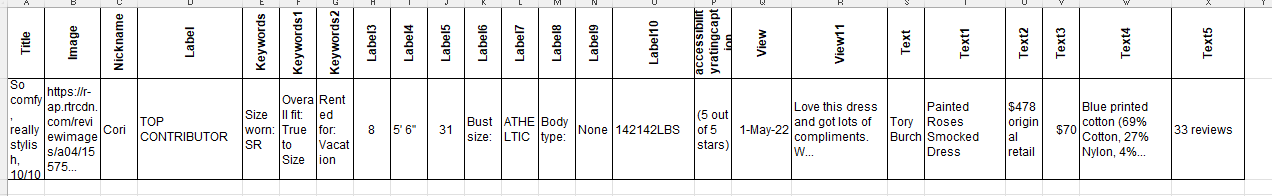

#### After the cleaning of the customer data, this is an example of the observation: 
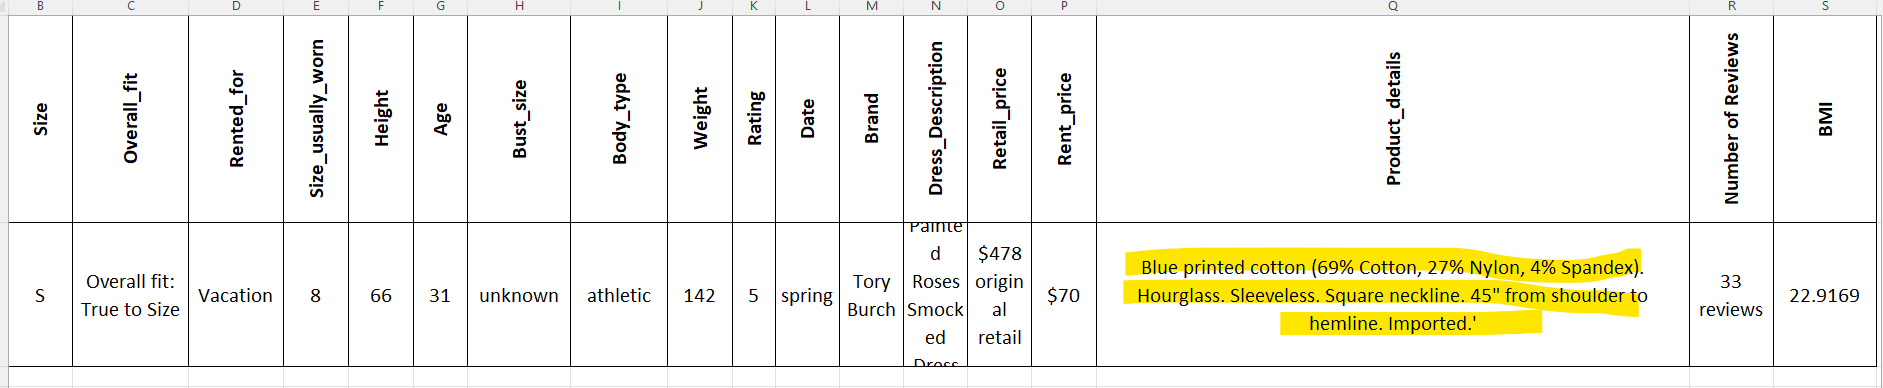

#### In the next notebook, II_Data_Cleaning_Garment_Data, the Product Detail will be broken down into different features describing the garment. Some other garment data will be cleaned. 